<a href="https://colab.research.google.com/github/GOKULSHANMUGAM010/GOKUL_SHANMUGAM_EDA/blob/main/GOKUL_SHANMUGAM_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 3**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

In [ ]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged_data.rename(columns={'Price_y': 'Price'}, inplace=True)

In [ ]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

In [ ]:

# Current date for recency calculation
current_date = datetime.now()

In [ ]:
# Aggregate features for customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'Region': 'first',
    'Price': 'mean',
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionDate': lambda x: (current_date - x.max()).days,
    'Category': 'nunique'
}).reset_index()


In [ ]:
# Rename TransactionDate to Recency
customer_profiles.rename(columns={'TransactionDate': 'Recency'}, inplace=True)

In [ ]:
# ----> Encode 'Region' column before scaling <----
le_region = LabelEncoder()
customer_profiles['Region'] = le_region.fit_transform(customer_profiles['Region'])

In [ ]:
# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(customer_profiles.iloc[:, 1:]) # Exclude CustomerID

In [ ]:
# Calculate cosine similarity
similarity_matrix = cosine_similarity(normalized_features)
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=customer_profiles['CustomerID'],
    columns=customer_profiles['CustomerID']
)

**CORRECT CODE**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
# Merge Datasets
# Merge transactions with customers and products
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Preprocess and rename columns to resolve conflicts
merged_data.rename(columns={'Price_y': 'Price'}, inplace=True)


In [ ]:

# Feature Engineering
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Add new features: Recency and unique product categories
from datetime import datetime
current_date = datetime.now()

customer_profiles = merged_data.groupby('CustomerID').agg({
    'Region': 'first',
    'Price': 'mean',
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency
    'Category': 'nunique'  # Number of unique categories purchased
}).reset_index()

# Rename TransactionDate to Recency
customer_profiles.rename(columns={'TransactionDate': 'Recency'}, inplace=True)

# Encode categorical data
le_region = LabelEncoder()
customer_profiles['Region'] = le_region.fit_transform(customer_profiles['Region'])

# Normalize numerical data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(customer_profiles.iloc[:, 1:])

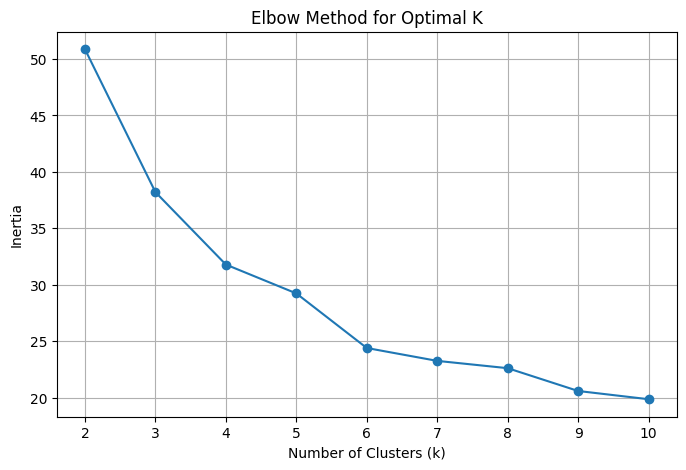

In [ ]:
#  Apply Clustering (K-Means)
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)  # Test between 2 and 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [ ]:
# Choose the optimal number of clusters (from elbow plot)
optimal_k = 4  # Replace with the best value from the Elbow Plot

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(normalized_data)

In [ ]:
# Evaluate Clustering
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_data, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.3f}")


Davies-Bouldin Index: 1.204


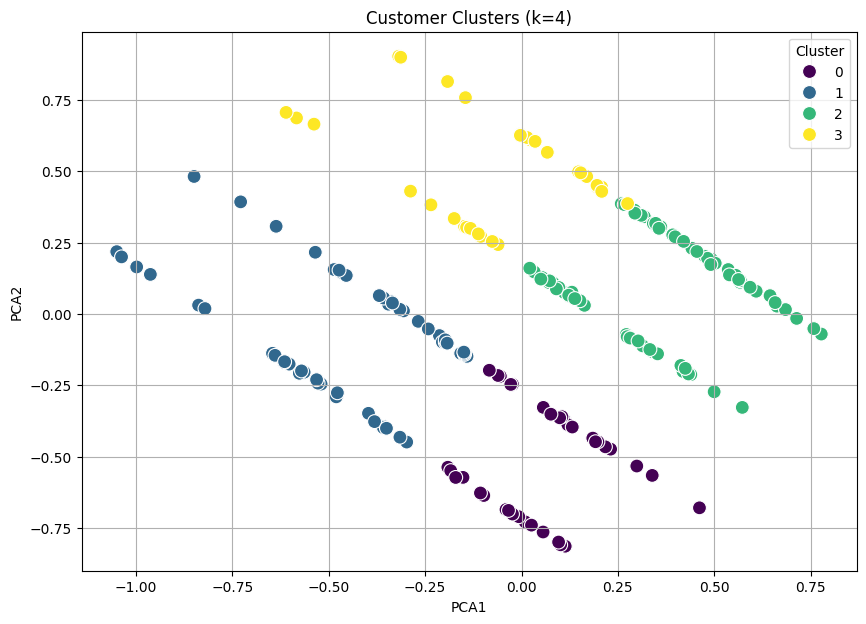

In [ ]:

#  Visualize Clusters
# Reduce dimensionality using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
customer_profiles['PCA1'] = pca_result[:, 0]
customer_profiles['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_profiles, palette='viridis', s=100
)
plt.title(f'Customer Clusters (k={optimal_k})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [ ]:
#  Save Results
# Save clustering results to a CSV file
customer_profiles.to_csv("GOKUL_SHANMUGAM_ClusteringResults.csv", index=False)

print(f"Clustering results saved to 'GOKUL_SHANMUGAM_ClusteringResults.csv'.")

Clustering results saved to 'GOKUL_SHANMUGAM_ClusteringResults.csv'.


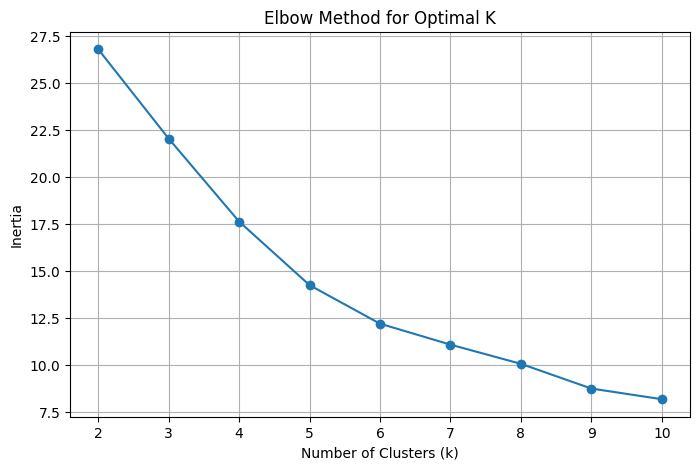

Davies-Bouldin Index: 1.064
Silhouette Score: 0.328


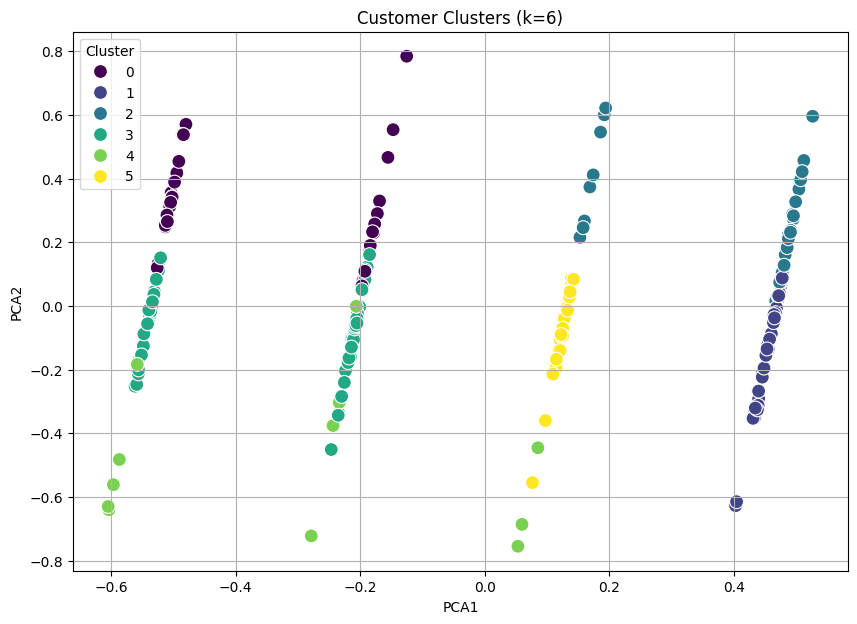

Clustering results saved to 'GOKUL_SHANMUGAM_ClusteringResults.csv'.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Load Datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Step 2: Merge Datasets
# Merge transactions with customers
merged_data = transactions.merge(customers, on="CustomerID")

# Step 3: Feature Engineering
# Convert TransactionDate to datetime and calculate recency
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
current_date = pd.Timestamp.now()

# Aggregate features to form customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'Region': 'first',                        # Region (assume one per customer)
    'Quantity': 'sum',                        # Total quantity purchased
    'TotalValue': 'sum',                      # Total transaction value
    'TransactionDate': lambda x: (current_date - x.max()).days  # Recency
}).reset_index()

# Rename TransactionDate to Recency
customer_profiles.rename(columns={'TransactionDate': 'Recency'}, inplace=True)

# Encode categorical data (Region)
le = LabelEncoder()
customer_profiles['Region'] = le.fit_transform(customer_profiles['Region'])

# Normalize numerical data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(customer_profiles.iloc[:, 1:])  # Exclude CustomerID

# Step 4: Apply Clustering (K-Means)
# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)  # Test between 2 and 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters based on the Elbow Curve
optimal_k = 6  # Replace this value based on the Elbow Curve analysis

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 5: Evaluate Clustering
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_data, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.3f}")

# Calculate Silhouette Score (optional for additional evaluation)
silhouette_avg = silhouette_score(normalized_data, customer_profiles['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Step 6: Visualize Clusters
# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
customer_profiles['PCA1'] = pca_result[:, 0]
customer_profiles['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_profiles, palette='viridis', s=100
)
plt.title(f'Customer Clusters (k={optimal_k})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.show()

# Step 7: Save Results
# Save clustering results to a CSV file
customer_profiles.to_csv("GOKUL_SHANMUGAM_ClusteringResults.csv", index=False)
print(f"Clustering results saved to 'GOKUL_SHANMUGAM_ClusteringResults.csv'.")
